## Simulating observations with MUSTANG-2

MUSTANG-2 is a bolometric array on the [Green Bank Telescope](https://en.wikipedia.org/wiki/Green_Bank_Telescope). In this notebook we simulate an observation of the Whirlpool Galaxy (M51).

2025-09-30 20:05:28.223 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/crab_nebula.fits


Downloading:   0%|                | 0.00/2.00M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 2.00M/2.00M [00:00<00:00, 68.0MB/s]

ProjectedMap:
  shape(nu, y, x): (1, 500, 500)
  stokes: naive
  nu: [93.] GHz
  t: naive
  z: naive
  quantity: rayleigh_jeans_temperature
  units: K_RJ
    min: 0.000e+00
    max: 5.876e-02
  center:
    ra:  05ʰ34ᵐ31.80ˢ
    dec: 22°01’3.00”
  size(y, x): (8.83’, 8.83’)
  resolution(y, x): (1.06”, 1.06”)
  beam(maj, min, rot): [0. 0. 0.] rad
  memory: 4 MB


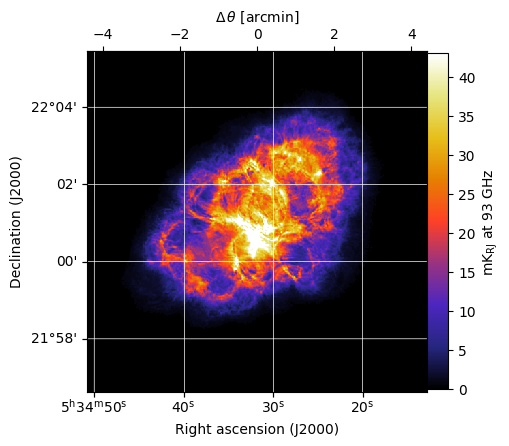

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/crab_nebula.fits"), nu=93e9)

input_map.plot()
print(input_map)

PlanList(2 plans, 900 s):
                           start_time duration    target(ra,dec)     center(az,el)
chunk                                                                             
0      2025-10-01 08:16:44.463 +00:00    600 s  (83.63°, 22.02°)   (116.2°, 60.9°)
1      2025-10-01 08:27:21.963 +00:00    300 s  (83.63°, 22.02°)  (118.8°, 62.32°)


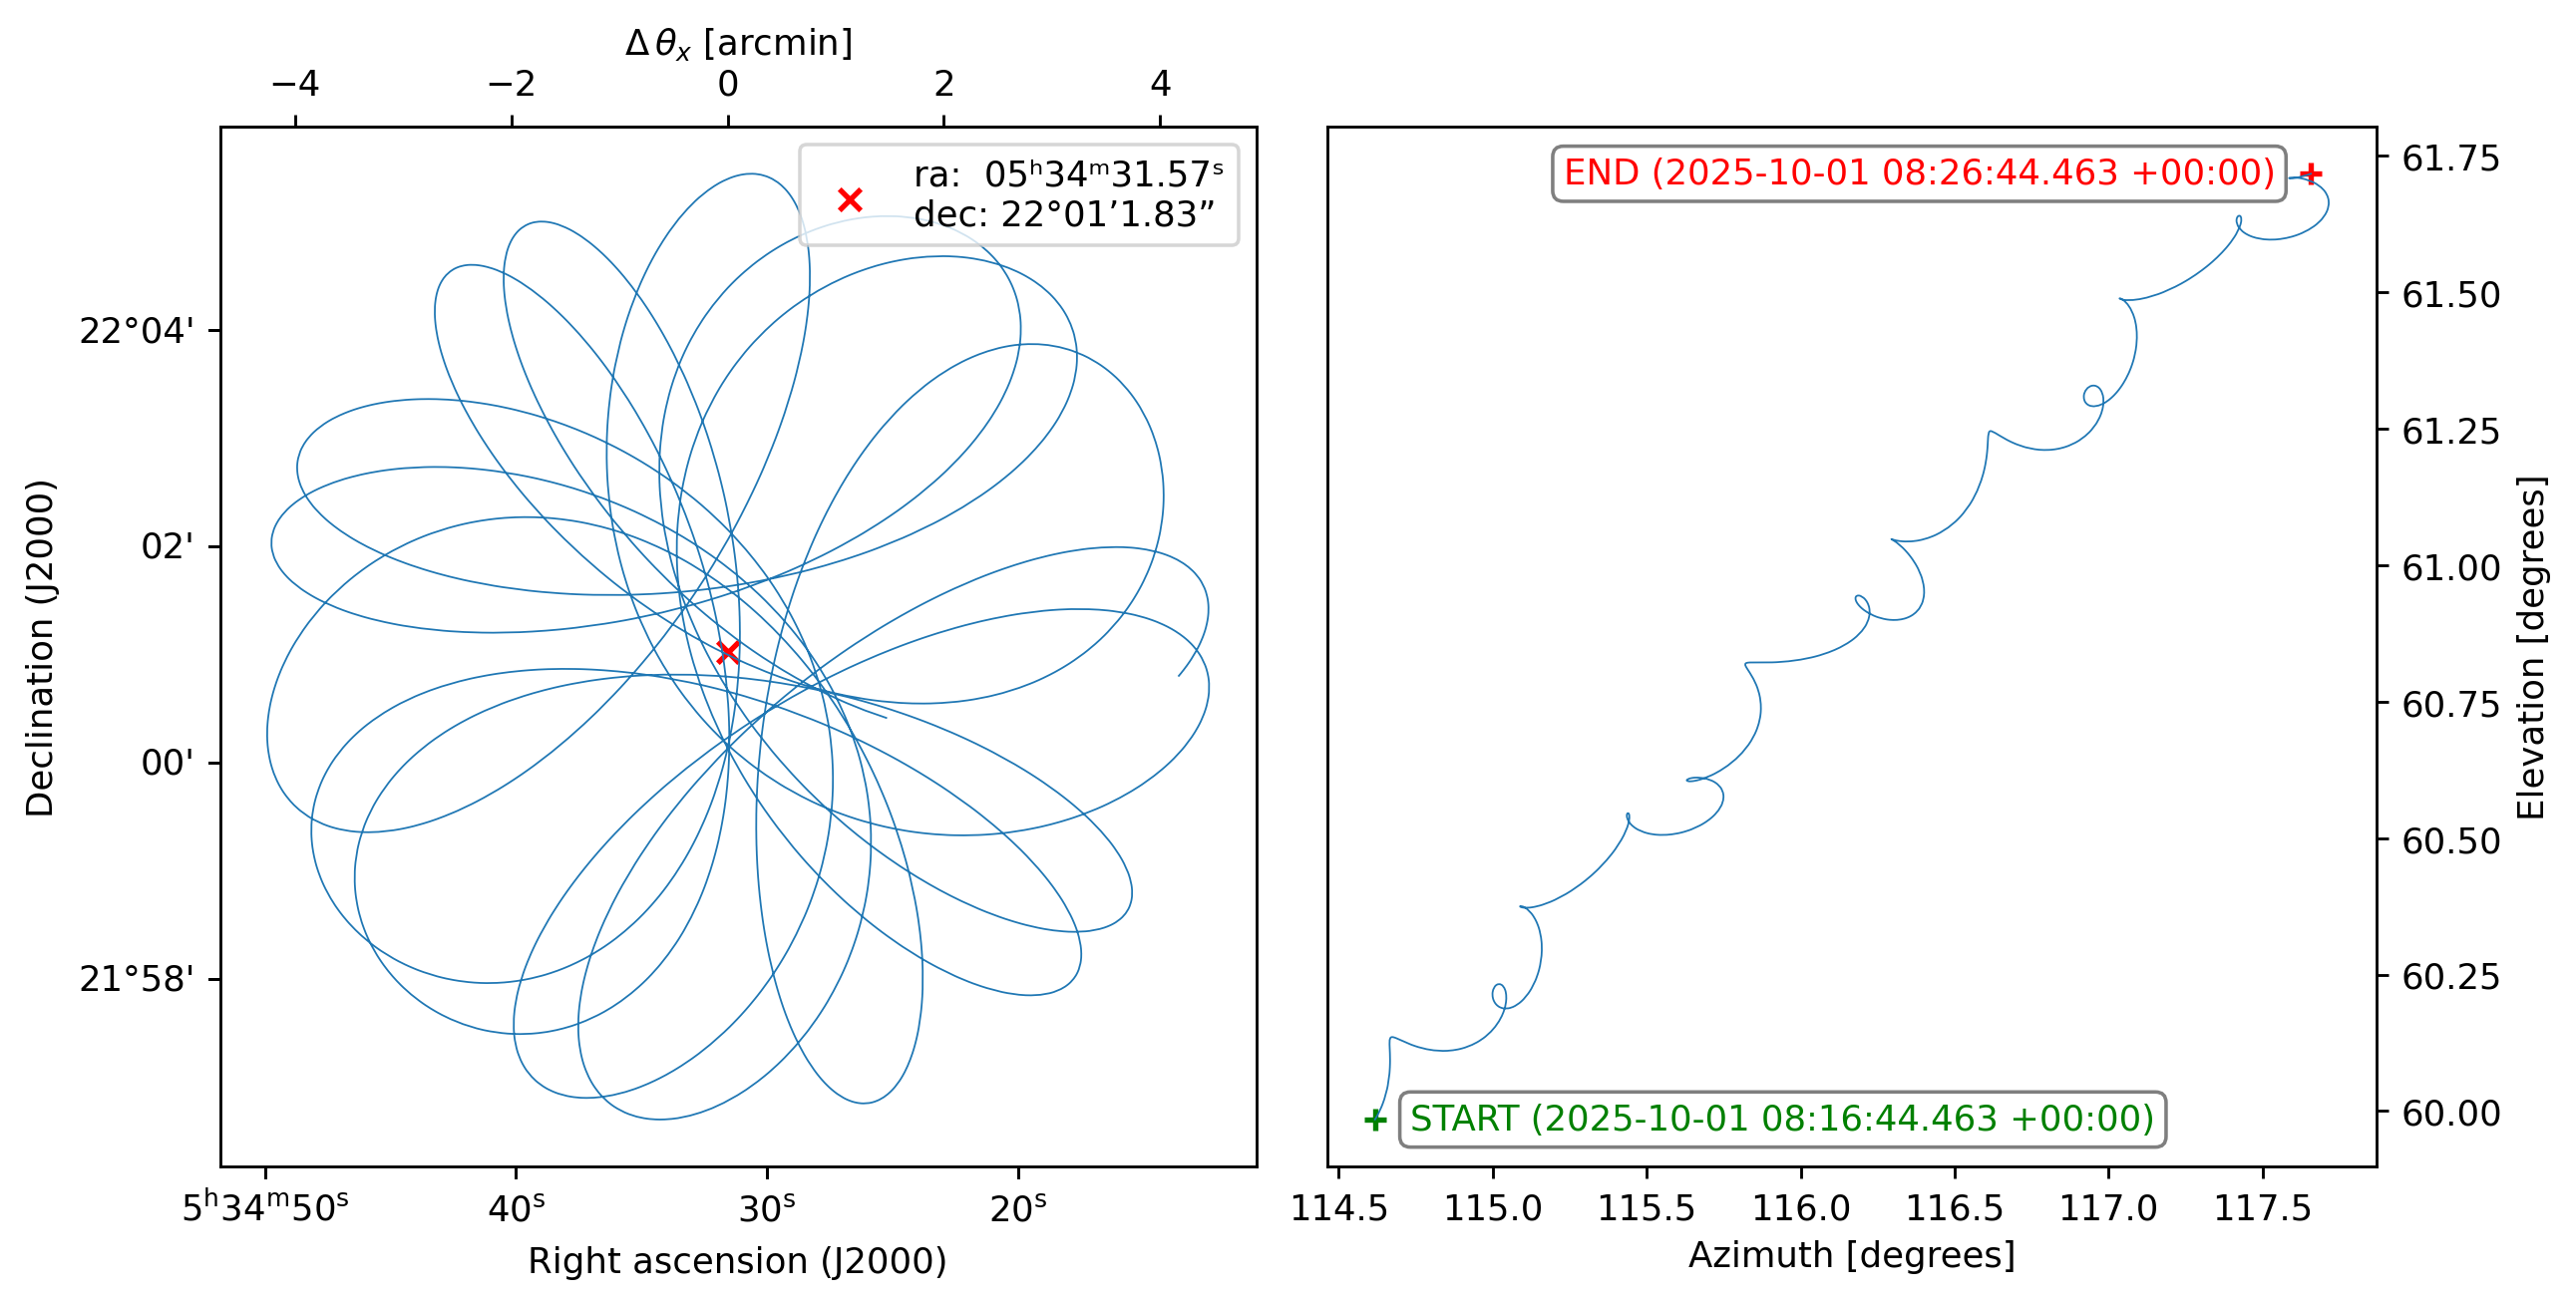

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="green_bank", constraints={"el": (60, 90)})
plans = planner.generate_plans(total_duration=900, sample_rate=100)

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n   FOV baseline      bands polarized
│  array1  217  4.2’      0 m  [m2/f093]     False
│ 
└ bands:
         name     center      width    η      NEP          NET_RJ          NET_CMB    FWHM
   0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK_RJ√s  0.6905 mK_CMB√s  9.133”


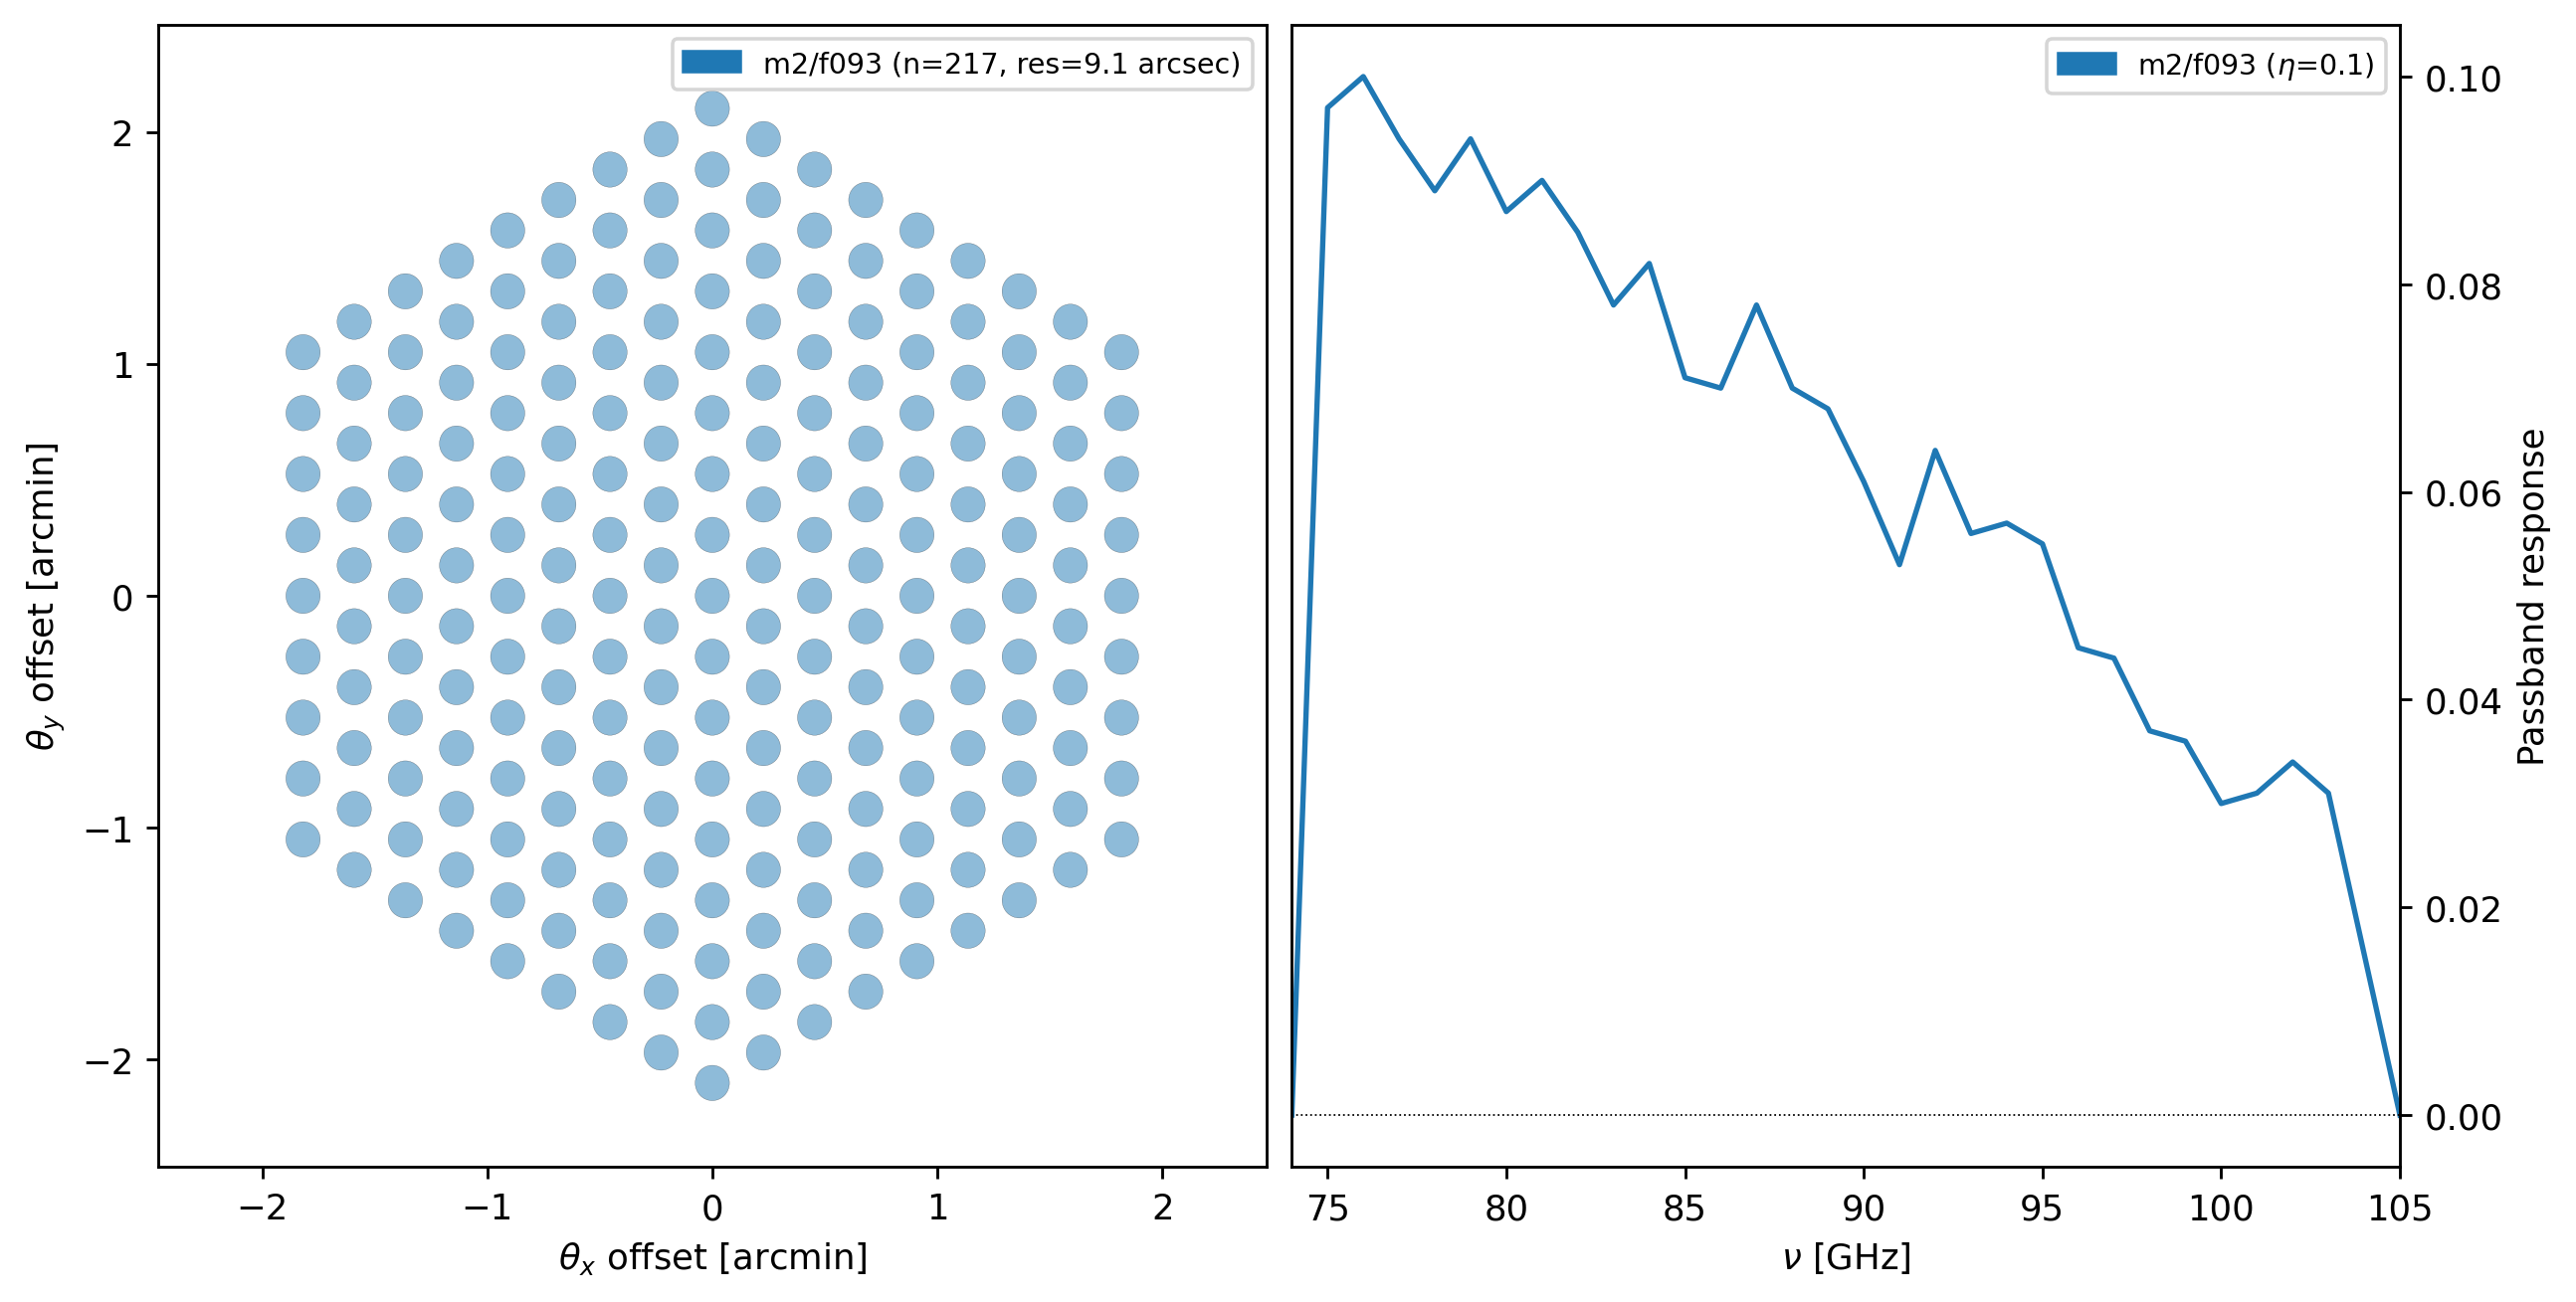

In [3]:
instrument = maria.get_instrument("MUSTANG-2")
print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="green_bank",
    map=input_map,
    atmosphere="2d",
)

print(sim)

2025-09-30 20:05:38.803 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/atmosphere/spectra/am/v3/green_bank.h5


Downloading:   0%|                | 0.00/22.0M [00:00<?, ?B/s]

Downloading:  73%|███████████▊    | 16.2M/22.0M [00:00<00:00, 162MB/s]

Downloading: 100%|████████████████| 22.0M/22.0M [00:00<00:00, 171MB/s]

2025-09-30 20:05:39.481 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/atmosphere/weather/era5/green_bank.h5


Downloading:   0%|                | 0.00/12.0M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 12.0M/12.0M [00:00<00:00, 171MB/s]

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n   FOV baseline      bands polarized
│ │  array1  217  4.2’      0 m  [m2/f093]     False
│ │ 
│ └ bands:
│          name     center      width    η      NEP          NET_RJ          NET_CMB    FWHM
│    0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK_RJ√s  0.6905 mK_CMB√s  9.133”
├ Site:
│   region: green_bank
│   timezone: America/New_York
│   location:
│     longitude: 79°50’23.28” W
│     latitude:  38°25’59.16” N
│     altitude: 825 m
│   seasonal: True
│   diurnal: True
├ PlanList(2 plans, 900 s):
│                            start_time duration    target(ra,dec)     center(az,el)
│ chunk                                                                             
│ 0      2025-10-01 08:16:44.463 +00:00    600 s  (83.63°, 22.02°)   (116.2°, 60.9°)
│ 1      2025-10-01 08:27:21.963 +00:00    300 s  (83.63°, 22.02°)  (118.8°, 62.32°)
├ '2d'
└ ProjectedMap:
    shape(stokes, nu, y, x): (1, 1, 500, 500)
    stokes:

2025-09-30 20:05:41.140 INFO: Simulating observation 1 of 2


Constructing atmosphere:   0%|                | 0/10 [00:00<?, ?it/s]

Constructing atmosphere:  20%|███▏            | 2/10 [00:00<00:00, 13.12it/s]

Constructing atmosphere:  40%|██████▍         | 4/10 [00:00<00:00, 12.87it/s]

Constructing atmosphere:  60%|█████████▌      | 6/10 [00:00<00:00, 13.13it/s]

Constructing atmosphere:  80%|████████████▊   | 8/10 [00:00<00:00, 13.43it/s]

Constructing atmosphere: 100%|████████████████| 10/10 [00:00<00:00, 13.61it/s]

Constructing atmosphere: 100%|████████████████| 10/10 [00:00<00:00, 13.39it/s]

Generating turbulence:   0%|                | 0/10 [00:00<?, ?it/s]

Generating turbulence:  40%|██████▍         | 4/10 [00:00<00:00, 38.90it/s]

Generating turbulence:  80%|████████████▊   | 8/10 [00:00<00:00, 38.42it/s]

Generating turbulence: 100%|████████████████| 10/10 [00:00<00:00, 38.68it/s]

Sampling turbulence:   0%|                | 0/10 [00:00<?, ?it/s]

Sampling turbulence:  10%|█▌              | 1/10 [00:01<00:10,  1.11s/it]

Sampling turbulence:  20%|███▏            | 2/10 [00:01<00:04,  1.68it/s]

Sampling turbulence:  30%|████▊           | 3/10 [00:01<00:03,  2.33it/s]

Sampling turbulence:  40%|██████▍         | 4/10 [00:01<00:02,  2.86it/s]

Sampling turbulence:  50%|████████        | 5/10 [00:02<00:01,  2.72it/s]

Sampling turbulence:  60%|█████████▌      | 6/10 [00:02<00:01,  3.14it/s]

Sampling turbulence:  70%|███████████▏    | 7/10 [00:02<00:00,  3.45it/s]

Sampling turbulence:  80%|████████████▊   | 8/10 [00:02<00:00,  3.70it/s]

Sampling turbulence:  90%|██████████████▍ | 9/10 [00:03<00:00,  3.91it/s]

Sampling turbulence: 100%|████████████████| 10/10 [00:03<00:00,  3.40it/s]

Sampling turbulence: 100%|████████████████| 10/10 [00:03<00:00,  2.85it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.04it/s, band=m2/f093]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.04it/s, band=m2/f093]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]            

Sampling map:   0%|                | 0/1 [00:06<?, ?it/s, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Sampling map: 100%|████████████████| 1/1 [00:06<00:00,  6.59s/it, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Sampling map: 100%|████████████████| 1/1 [00:06<00:00,  6.59s/it, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.20it/s, band=m2/f093]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.20it/s, band=m2/f093]

2025-09-30 20:06:04.939 INFO: Simulated observation 1 of 2 in 23.79 s


2025-09-30 20:06:04.940 INFO: Simulating observation 2 of 2


Constructing atmosphere:   0%|                | 0/10 [00:00<?, ?it/s]

Constructing atmosphere:  20%|███▏            | 2/10 [00:00<00:00, 17.91it/s]

Constructing atmosphere:  40%|██████▍         | 4/10 [00:00<00:00, 17.52it/s]

Constructing atmosphere:  60%|█████████▌      | 6/10 [00:00<00:00, 17.56it/s]

Constructing atmosphere:  80%|████████████▊   | 8/10 [00:00<00:00, 17.34it/s]

Constructing atmosphere: 100%|████████████████| 10/10 [00:00<00:00, 16.72it/s]

Constructing atmosphere: 100%|████████████████| 10/10 [00:00<00:00, 17.03it/s]

Generating turbulence:   0%|                | 0/10 [00:00<?, ?it/s]

Generating turbulence:  60%|█████████▌      | 6/10 [00:00<00:00, 51.63it/s]

Generating turbulence: 100%|████████████████| 10/10 [00:00<00:00, 52.30it/s]

Sampling turbulence:   0%|                | 0/10 [00:00<?, ?it/s]

Sampling turbulence:  10%|█▌              | 1/10 [00:01<00:12,  1.35s/it]

Sampling turbulence:  20%|███▏            | 2/10 [00:01<00:05,  1.44it/s]

Sampling turbulence:  30%|████▊           | 3/10 [00:01<00:03,  2.03it/s]

Sampling turbulence:  40%|██████▍         | 4/10 [00:02<00:02,  2.56it/s]

Sampling turbulence:  60%|█████████▌      | 6/10 [00:02<00:01,  3.46it/s]

Sampling turbulence:  70%|███████████▏    | 7/10 [00:02<00:00,  3.67it/s]

Sampling turbulence:  80%|████████████▊   | 8/10 [00:02<00:00,  3.87it/s]

Sampling turbulence:  90%|██████████████▍ | 9/10 [00:03<00:00,  4.02it/s]

Sampling turbulence: 100%|████████████████| 10/10 [00:03<00:00,  3.61it/s]

Sampling turbulence: 100%|████████████████| 10/10 [00:03<00:00,  2.85it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.48it/s, band=m2/f093]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.48it/s, band=m2/f093]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]            

Sampling map:   0%|                | 0/1 [00:03<?, ?it/s, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Sampling map: 100%|████████████████| 1/1 [00:03<00:00,  3.99s/it, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Sampling map: 100%|████████████████| 1/1 [00:03<00:00,  3.99s/it, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.96it/s, band=m2/f093]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.95it/s, band=m2/f093]

2025-09-30 20:06:20.206 INFO: Simulated observation 2 of 2 in 15.26 s


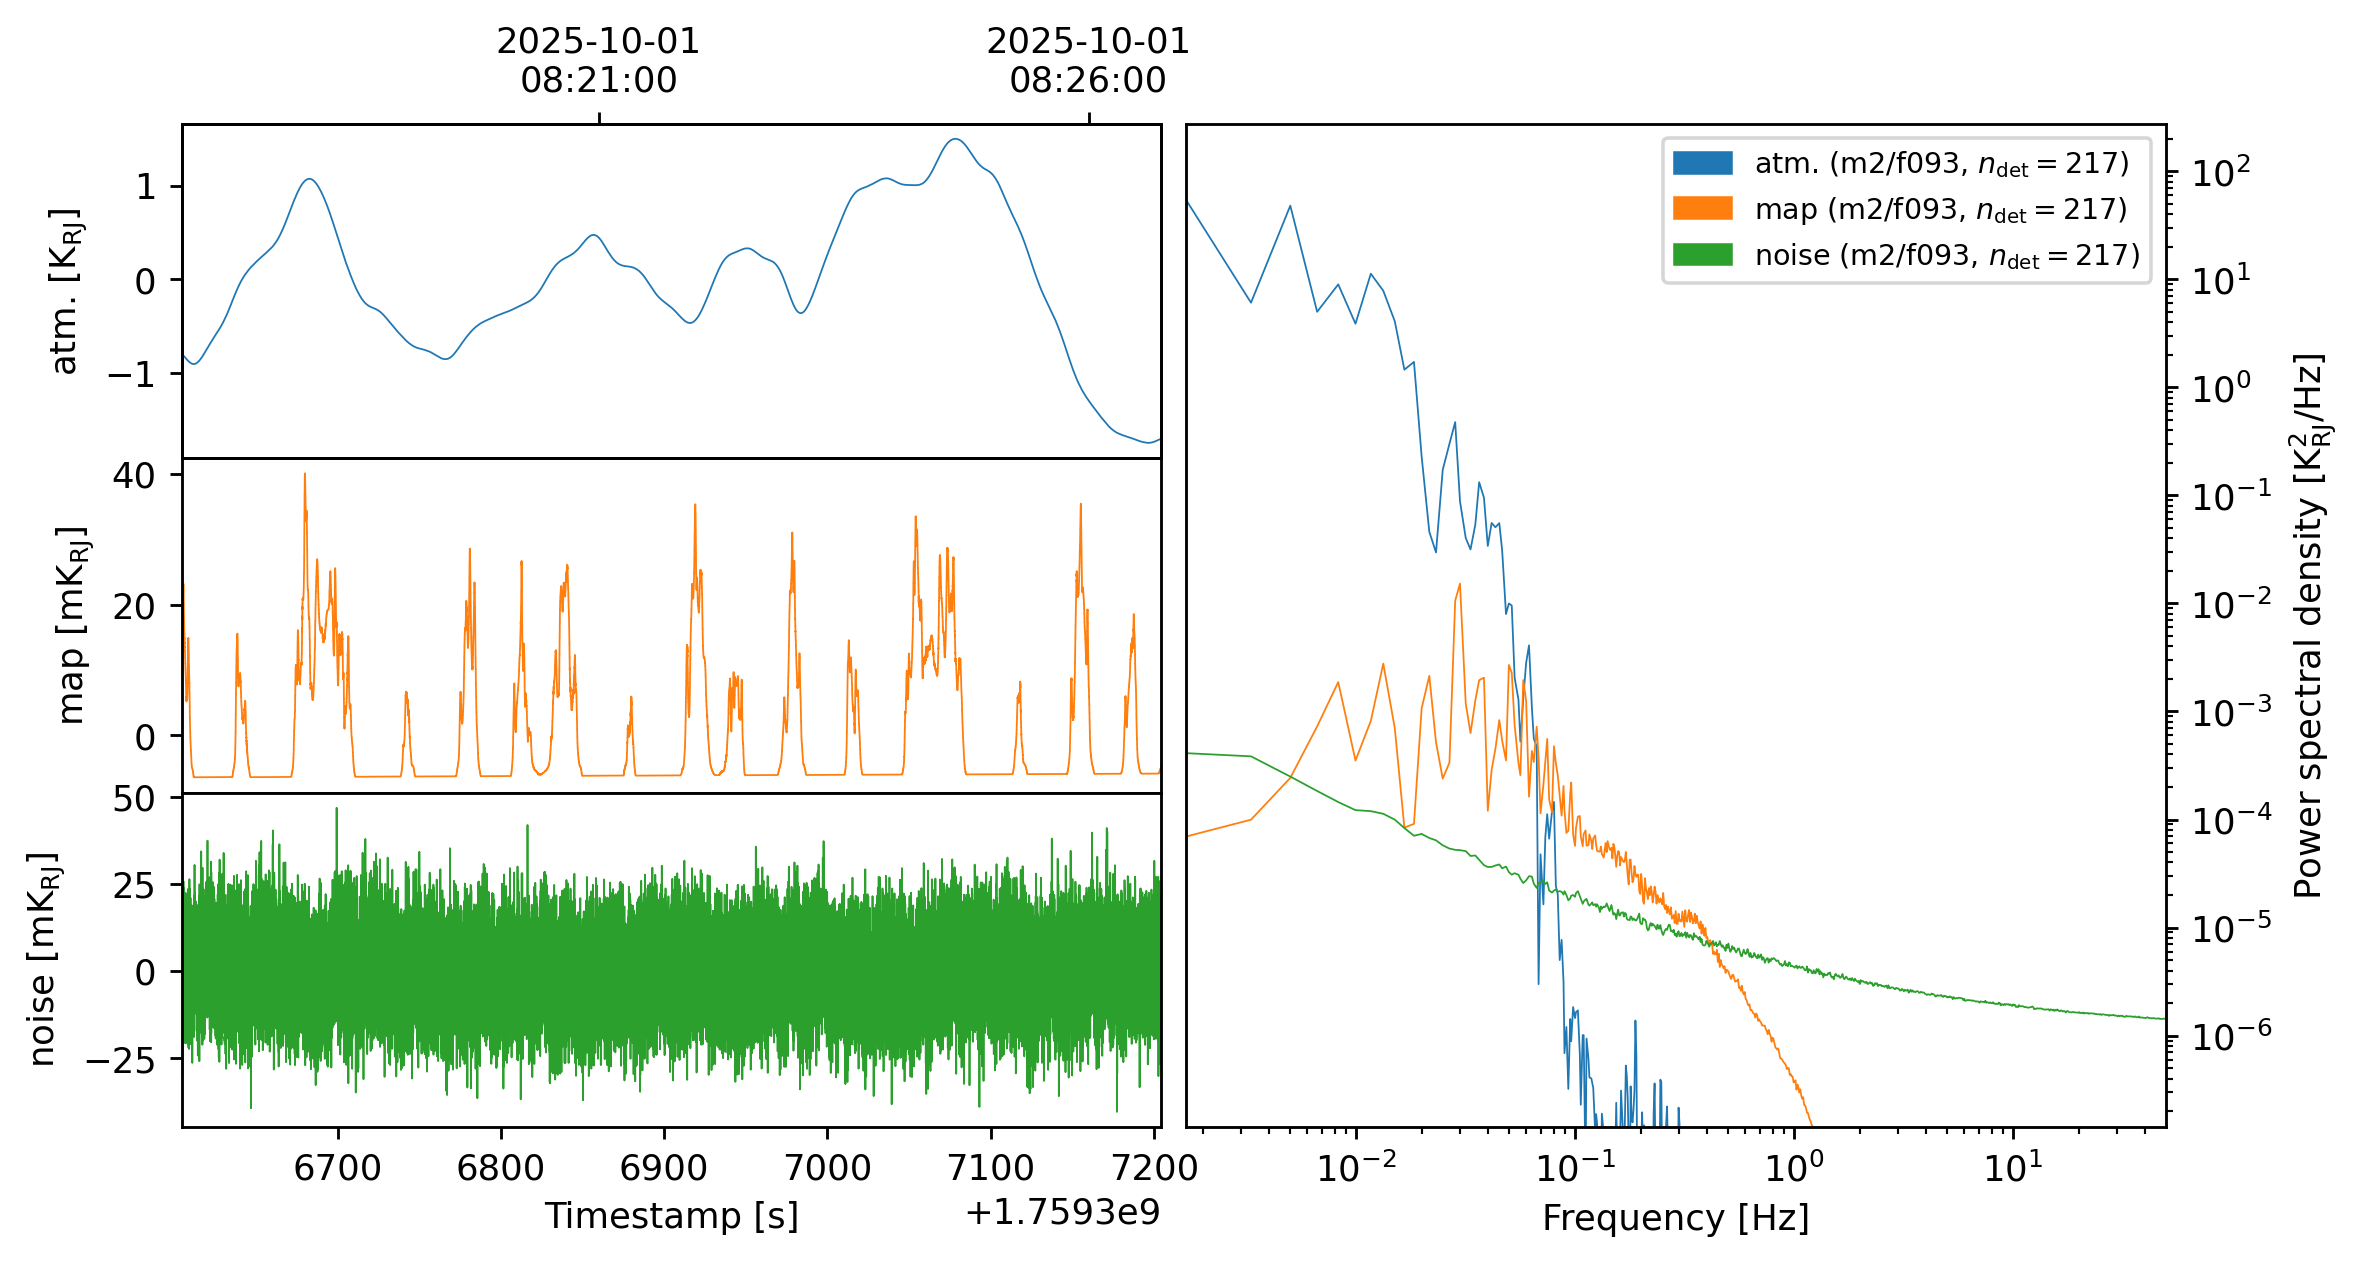

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=input_map.center,
    frame="ra/dec",
    width=10 / 60,
    height=10 / 60,
    resolution=0.05 / 60,
    tod_preprocessing={
        "window": {"name": "hamming"},
        "remove_modes": {"modes_to_remove": [0]},
        "remove_spline": {"knot_spacing": 60, "remove_el_gradient": True},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
        "median_filter": {"size": 1},
    },
    units="uK_RJ",
)

mapper.add_tods(tods)
output_map = mapper.run()

Mapping band m2/f093:   0%|          | 0/2 [00:00<?, ?it/s, stokes=I, tod=1/2]

Mapping band m2/f093:   0%|          | 0/2 [00:03<?, ?it/s, stokes=I, tod=1/2]

Mapping band m2/f093:  50%|█████     | 1/2 [00:03<00:03,  3.95s/it, stokes=I, tod=1/2]

Mapping band m2/f093:  50%|█████     | 1/2 [00:06<00:03,  3.95s/it, stokes=I, tod=2/2]

Mapping band m2/f093: 100%|██████████| 2/2 [00:06<00:00,  2.93s/it, stokes=I, tod=2/2]

Mapping band m2/f093: 100%|██████████| 2/2 [00:06<00:00,  3.09s/it, stokes=I, tod=2/2]


2025-09-30 20:06:31.274 INFO: Ran mapper for band m2/f093 in 6.177 s.


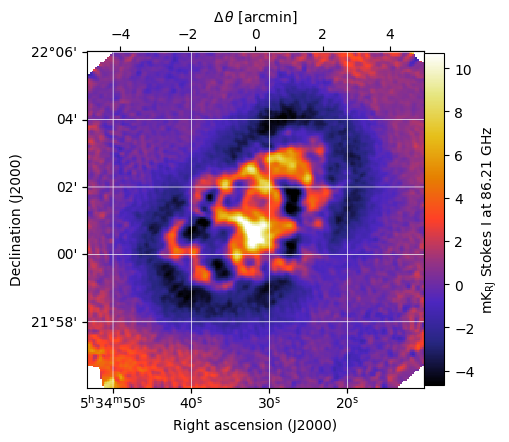

In [7]:
output_map.plot()
output_map.to_fits("/tmp/simulated_mustang_map.fits")